# NPCI MLOps Playground Challenge - 4 

[Total: 20 Marks]

## Problem Statement 

Develop a machine learning model that predicts the likelihood of a borrower defaulting on a loan based on factors such as credit history, repayment capacity, and annual income. This model aims to assist financial institutions in assessing the potential financial impact of credit risk and making informed lending decisions.

## Credit Risk Prediction

Credit Risk refers to the likelihood of a borrower failing to repay a loan, leading to potential financial losses for the lender. When financial institutions extend services like mortgages, credit cards, or personal loans, there exists an inherent risk that the borrower may default on their repayment obligations. To evaluate this risk, factors like credit history, repayment capacity, loan terms, and annual income can be considered.

Many companies, especially financial institutions, evaluate the credit risk of their existing and forthcoming customers. With the advent of technologies like machine learning, organizations can analyze customer data to establish a risk profile. Credit risk modeling evaluates a borrower's credit risk based primarily on two factors. The first factor is determining the probability of a borrower defaulting on a loan, while the second factor involves evaluating the financial impact on the lender in case of such a default.



## Dataset Description

The dataset you'll be working with is the Credit Risk dataset, which includes the following features:

* **person_age** - Age
* **person_income** - Annual Income
* **person_home_ownership** - Home ownership
* **person_emp_length** - Employment length (in years)
* **loan_intent** - Loan intent
* **loan_grade** - Loan grade
* **loan_amnt** - Loan amount
* **loan_int_rate** - Interest rate
* **loan_status** - Loan status (0 is non default 1 is default)
* **loan_percent_income** - Percent income
* **cb_person_default_on_file** - Historical default
* **cb_preson_cred_hist_length** - Credit history length


### Importing required packages  [1 Mark]


In [1]:
# ToDo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


### Loading the data  [1 Mark]

In [22]:
# First upload the provided `credit_risk_dataset.csv` then load it as pandas dataframe
# ToDo

df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


### EDA [2 Marks] 

Explore the data, understand the features and handle the missing values.

In [23]:
# Get the shape of the dataframe
# ToDo
print("Dataset Shape:", df.shape)

Dataset Shape: (32581, 12)


In [24]:
# Display few rows of the dataframe
# ToDo
df.head(20)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [25]:
# Generate descriptive statistics for the DataFrame, to get summary statistics for numerical columns.
# ToDo
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [26]:
# Generate information about the DataFrame, including index details, column data types, and non-null values.
# ToDo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### Data Preprocessing

#### Handling Missing values  [1 Mark]

In [27]:
# Display the total number of null values of each column
# ToDo
print(df.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


Columns **person_emp_length** and **loan_int_rate** have null values.
Handle them by replacing the missing values with the mean of the respective columns.


In [28]:
# Handle missing values - replace the missing values with the mean value of that numerical feature
# ToDo
df["person_emp_length"].fillna(df["person_emp_length"].mean(), inplace=True)


/tmp/ipykernel_7295/1181305679.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["person_emp_length"].fillna(df["person_emp_length"].mean(), inplace=True)


In [29]:
print(df.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [30]:
df["loan_int_rate"].fillna(df["loan_int_rate"].mean(), inplace=True)

/tmp/ipykernel_7295/3272781512.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["loan_int_rate"].fillna(df["loan_int_rate"].mean(), inplace=True)


In [31]:
print(df.isnull().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


#### Handling categorical columns [3 Marks]

In [32]:
# Check for categorical columns
# ToDo
categorical_columns=df.select_dtypes(include=['object']).columns
print("Categorical Columns:",categorical_columns.to_list())

Categorical Columns: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [33]:
# Get the distinct categories present in each categorical column
# ToDo
for col in categorical_columns:
    print("Unique values in", col, ":", df[col].unique())

Unique values in person_home_ownership : ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Unique values in loan_intent : ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
Unique values in loan_grade : ['D' 'B' 'C' 'A' 'E' 'F' 'G']
Unique values in cb_person_default_on_file : ['Y' 'N']


In [34]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
# Create dictionaries to map categorical values to numbers. OR Use LabelEncoder
# ToDo
label_encoders =  {}
encoding_dict = {}

In [38]:
# Map categorical values to numbers using respective dictionaries
# ToDo
for col in categorical_columns:
    
    le = LabelEncoder()

    df[col] = le.fit_transform(df[col])

    label_encoders[col] = le

    encoding_dict[col] = {val: idx for idx, val in zip(le.classes_, le.transform(le.classes_))}


In [41]:
encoded_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
print(df[encoded_columns].head(20))


    person_home_ownership  loan_intent  loan_grade  cb_person_default_on_file
0                       3            4           3                          1
1                       2            1           1                          0
2                       0            3           2                          0
3                       3            3           2                          0
4                       3            3           2                          1
5                       2            5           0                          0
6                       3            1           1                          0
7                       3            3           1                          0
8                       3            4           0                          0
9                       2            5           3                          0
10                      3            5           1                          0
11                      2            2           0              

In [39]:
# Display the data to observe the changes
# ToDo
# Display encoded dataframe

print("Encoded DataFrame:\n", df)

# Display encoding dictionary

print("\nEncoding Dictionary:\n", encoding_dict)


Encoded DataFrame:
        person_age  person_income  person_home_ownership  person_emp_length  \
0              22          59000                      3              123.0   
1              21           9600                      2                5.0   
2              25           9600                      0                1.0   
3              23          65500                      3                4.0   
4              24          54400                      3                8.0   
...           ...            ...                    ...                ...   
32576          57          53000                      0                1.0   
32577          54         120000                      0                4.0   
32578          65          76000                      3                3.0   
32579          56         150000                      0                5.0   
32580          66          42000                      3                2.0   

       loan_intent  loan_grade  loan_amnt  

#### Get/Visualize the count of each classes(defaulter or Not) to understand class distribution [1 Mark]

In [ ]:
# Calculate the class distribution
# ToDo
class_distribution = df['loan_status'].value_counts()
print("Class Distribution:\n", class_distribution)

class_distribution_percent = df['loan_status'].value_counts(normalize=True) * 100
print("Class Distribution (Percentage):\n", class_distribution_percent)





Class Distribution:
 loan_status
0    25473
1     7108
Name: count, dtype: int64
Class Distribution (Percentage):
 loan_status
0    78.183604
1    21.816396
Name: proportion, dtype: float64


/tmp/ipykernel_7295/2424414215.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


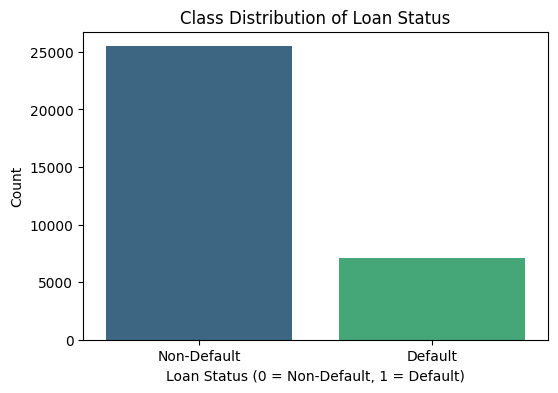

In [44]:
# Create a bar plot
# ToDo
# Count the occurrences of each class
class_counts = df['loan_status'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")

# Labels and title
plt.xlabel("Loan Status (0 = Non-Default, 1 = Default)")
plt.ylabel("Count")
plt.title("Class Distribution of Loan Status")
plt.xticks([0, 1], ['Non-Default', 'Default'])  # Rename x-axis labels
plt.show()


### Define target variable and features [1 Mark]

In [46]:
# Define features(X) and target variable(y)
# ToDo

y = df['loan_status']
X = df.drop(columns=['loan_status'])

# Display shapes to verify
print("Features Shape:", X.shape)
print("Target Shape:", y.shape)

Features Shape: (32581, 11)
Target Shape: (32581,)


### Train-Test split [1 Mark]

In [47]:
# Split the data into training and testing sets
# Use `stratify` parameter to maintain the class distribution across the training and testing set
# ToDo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (26064, 11)
Testing Features Shape: (6517, 11)
Training Target Shape: (26064,)
Testing Target Shape: (6517,)


### Check the class distribution in the training and test sets [1 Mark]

Ensure that both sets have same target class distribution as of the original dataset

In [52]:
# Calculate the class distribution in the training set
# ToDo

train_class_distribution = y_train.value_counts()


print("Class Distribution in Training Set:\n", train_class_distribution)


train_class_distribution_percent = y_train.value_counts(normalize=True) * 100
print("\nClass Distribution in Training Set (Percentage):\n", train_class_distribution_percent)

Class Distribution in Training Set:
 loan_status
0    20378
1     5686
Name: count, dtype: int64

Class Distribution in Training Set (Percentage):
 loan_status
0    78.184469
1    21.815531
Name: proportion, dtype: float64


In [53]:
# Calculate the class distribution in the testing set
# ToDo
test_class_distribution = y_test.value_counts()
print("Class Distribution in Testing Set:\n", test_class_distribution)

test_class_distribution_percent = y_test.value_counts(normalize=True) * 100
print("\nClass Distribution in Testing Set (Percentage):\n", test_class_distribution_percent)


Class Distribution in Testing Set:
 loan_status
0    5095
1    1422
Name: count, dtype: int64

Class Distribution in Testing Set (Percentage):
 loan_status
0    78.180144
1    21.819856
Name: proportion, dtype: float64


In [54]:
original_distribution = y.value_counts(normalize=True) * 100

# Calculate class distribution in training set
train_distribution = y_train.value_counts(normalize=True) * 100

# Calculate class distribution in testing set
test_distribution = y_test.value_counts(normalize=True) * 100

# Print distributions
print("Original Dataset Class Distribution:\n", original_distribution)
print("\nTraining Set Class Distribution:\n", train_distribution)
print("\nTesting Set Class Distribution:\n", test_distribution)

Original Dataset Class Distribution:
 loan_status
0    78.183604
1    21.816396
Name: proportion, dtype: float64

Training Set Class Distribution:
 loan_status
0    78.184469
1    21.815531
Name: proportion, dtype: float64

Testing Set Class Distribution:
 loan_status
0    78.180144
1    21.819856
Name: proportion, dtype: float64


### Feature Scaling [1 Mark]

In [55]:
# Initialize StandardScaler and transform the training and testing features
# ToDo
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Scaled Training Data (first 5 rows):\n", X_train_scaled.head())

Scaled Training Data (first 5 rows):
    person_age  person_income  person_home_ownership  person_emp_length  \
0   -0.427163       2.759666              -1.175573          -0.193163   
1   -1.059358      -0.754040               0.920052           0.049975   
2   -0.427163      -0.204717              -1.175573           1.265664   
3    0.046983      -0.772874               0.221510          -0.001161   
4   -0.427163      -0.251802              -1.175573          -0.679439   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0    -0.885275   -1.046681   1.021455      -1.289077            -0.937956   
1     0.848642   -0.187122  -1.281664       0.378651            -0.844328   
2     0.270669   -0.187122   1.021455       0.492434             1.215493   
3     0.270669    0.672438  -0.725739       0.963819             1.215493   
4     1.426614   -1.046681   0.068440      -1.012748             0.279211   

   cb_person_default_on_file  cb_person_cred_hist_leng

### Model Training [3 Mars]


In [56]:
# Initialize the LogisticRegression model
# ToDo
logistic_model = LogisticRegression(random_state=42)

print(logistic_model)



LogisticRegression(random_state=42)


In [57]:
# Fit the model with the SCALED training data
# ToDo
logistic_model.fit(X_train_scaled, y_train)

# Print confirmation
print("Logistic Regression model training complete!")

Logistic Regression model training complete!


In [58]:
# Initialize the DecisionTreeClassifier model
# ToDo

# Fit the model with the unscaled training data (Feature Scaling is not necessary for Tree based models)
# ToDo

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

print("Decision Tree model training complete!")

Decision Tree model training complete!


In [79]:
# Initialize the RandomForestClassifier model
# ToDo

# Fit the model with the unscaled training data (Feature Scaling is not necessary for Tree based models)
# ToDo

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

print("Random Forest model training complete!")

Random Forest model training complete!


### Model Evaluation [2 Marks]


In [60]:
# Make predictions on the test set with each of the models above
# ToDo

y_pred_logistic = logistic_model.predict(X_test_scaled)  # Use scaled data for Logistic Regression
y_pred_dt = dt_model.predict(X_test)  # Use unscaled data for Decision Tree
y_pred_rf = rf_model.predict(X_test)  # Use unscaled data for Random Forest

# Print confirmation
print("Predictions completed for all models!")

Predictions completed for all models!


In [61]:
# Evaluate each of the model performance

# Show accuracy, f1 score, precision, & recall for each of the trained models
# ToDo

def evaluate_model(model_name, y_test, y_pred):
    print(f"\n{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))

# Logistic Regression
evaluate_model("Logistic Regression", y_test, y_pred_logistic)

# Decision Tree
evaluate_model("Decision Tree", y_test, y_pred_dt)

# Random Forest
evaluate_model("Random Forest", y_test, y_pred_rf)


Logistic Regression Performance:
Accuracy: 0.8450207150529385
F1 Score: 0.5680068434559452
Precision: 0.7248908296943232
Recall: 0.4669479606188467

Decision Tree Performance:
Accuracy: 0.8905938315175694
F1 Score: 0.7532017999307719
Precision: 0.7416496250852079
Recall: 0.7651195499296765

Random Forest Performance:
Accuracy: 0.9300291545189504
F1 Score: 0.8150851581508516
Precision: 0.9626436781609196
Recall: 0.7067510548523207


### Inference [2 Marks]

In [97]:
# Create a sample input dictionary with keys as feature names and values as feature values
# ToDo

sample_input = {
    "person_age": 35,
    "person_income": 50000,
    "person_home_ownership": 2,  # Encoded value (e.g., 1 = Rent, 2 = Own, etc.)
    "person_emp_length": 5,  # Employment length in years
    "loan_intent": 3,  # Encoded value (e.g., 3 = Debt Consolidation, etc.)
    "loan_grade": 2,  # Encoded value (e.g., 2 = Grade B, etc.)
    "loan_amnt": 15000,
    "loan_int_rate": 12.5,
    "loan_percent_income": 0.3,
    "cb_person_default_on_file": 1,  # Encoded value (0 = No, 1 = Yes)
    "cb_person_cred_hist_length": 10  # Credit history length in years
}


# Convert the sample input dictionary into a dataframe to feed to the model
# ToDo
sample_df = pd.DataFrame([sample_input])

print("Sample Input DataFrame:\n", sample_df)

Sample Input DataFrame:
    person_age  person_income  person_home_ownership  person_emp_length  \
0          35          50000                      2                  5   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0            3           2      15000           12.5                  0.3   

   cb_person_default_on_file  cb_person_cred_hist_length  
0                          1                          10  


In [98]:
# Define a simple fuction to make prediction for the sample input (use the best model among the above trained models)
# ToDo

def predict_credit_risk(sample_dict, model, scaler=None):
    
    sample_df = pd.DataFrame([sample_dict])

    if scaler:
        sample_df = scaler.transform(sample_df)
    
    prediction = model.predict(sample_df)[0]  # Get the single prediction
    
    result = "Default" if prediction == 1 else "Non-Default"
    return result


In [99]:
# Make prediction using the defined function using the sample input
# ToDo
prediction_result = predict_credit_risk(sample_input,rf_model)

print(prediction_result)



Non-Default
